In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([12, 19])
mean_2 = np.array([-10, -20])

In [3]:
cov_1 = np.array([[1, 15], [15, 1]])
cov_2 = np.array([[1, 10], [10, 1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000) # Multivariate means distribution with more than 1 dimensions
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000) # Multivariate means distribution with more than 1 dimensions

C:\Users\bhatt\AppData\Local\Temp\ipykernel_188\2167319079.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000) # Multivariate means distribution with more than 1 dimensions
C:\Users\bhatt\AppData\Local\Temp\ipykernel_188\2167319079.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000) # Multivariate means distribution with more than 1 dimensions


In [5]:
dist_1.shape, dist_2.shape

((1000, 2), (1000, 2))

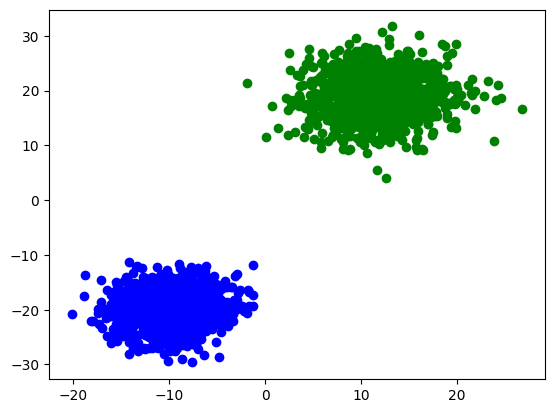

In [6]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'blue')

In [7]:
dataset = np.zeros((2000, 3))

dataset[:1000, :-1] = dist_1
dataset[1000:, :-1] = dist_2
dataset[1000:, -1] = 1

In [8]:
u = np.mean(dataset[:, : -1], axis = 0)
std = np.std(dataset[:, : -1], axis = 0)
dataset[:, : -1] = (dataset[:, : -1] - u)/std

In [9]:
ones = np.ones((dataset.shape[0], 1))
dataset = np.hstack((ones, dataset))

In [10]:
np.random.shuffle(dataset)

In [11]:
print(dataset[:10])

[[ 1.          1.30448327  1.07749963  0.        ]
 [ 1.         -1.32127112 -1.0200269   1.        ]
 [ 1.          0.686463    0.7525098   0.        ]
 [ 1.          0.29105262  0.86697695  0.        ]
 [ 1.         -1.31075342 -0.85359088  1.        ]
 [ 1.          1.62778767  1.37445656  0.        ]
 [ 1.         -0.84811886 -1.23763621  1.        ]
 [ 1.          1.61322034  0.9016113   0.        ]
 [ 1.          1.20383389  1.04843628  0.        ]
 [ 1.          1.04765208  0.72747019  0.        ]]


In [12]:
split = 0.8

train_X = dataset[:int(split * dataset.shape[0]), :-1]
test_X = dataset[int(split * dataset.shape[0]):, :-1]
train_Y = dataset[:int(split * dataset.shape[0]), -1]
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [13]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [14]:
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [15]:
def loss_func(X, weights, Y):
    Y_pred = hypothesis(X, weights)
    loss = np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    return -1 * loss

In [16]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
        
    return grad/X.shape[0]

In [17]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 10000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights + lr_rate * grad
        
    return weights, loss_epoch

In [18]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

1.5651094913482666


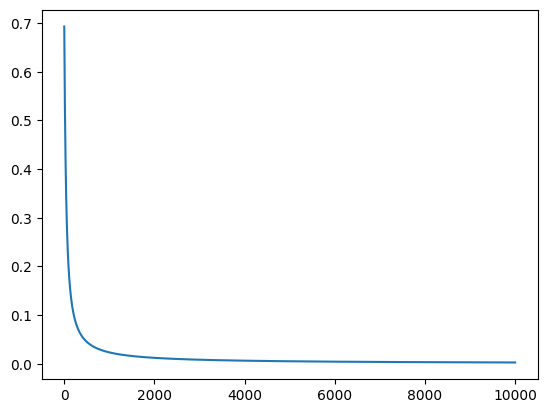

In [19]:
plt.plot(loss_epoch)